In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Vishal Singh\Desktop\data analysis projects\coevetatechnologies/iris.csv')

In [3]:
# View initial data
print("Initial Data Snapshot:")
display(df.head())

Initial Data Snapshot:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Step 3: Identify missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Step 4: Handle missing values
# Example: fill numeric columns with mean
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [6]:
# Example: fill categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [7]:
# Step 5: Remove duplicate rows
df = df.drop_duplicates()


In [8]:
# Step 6: Standardize date formats (if 'date' column exists)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [9]:
# Step 7: Standardize categorical values
# Example: make all 'category' column lowercase and strip spaces
if 'category' in df.columns:
    df['category'] = df['category'].str.lower().str.strip()

In [10]:
# Step 8: Final check
print("\nCleaned Data Snapshot:")
display(df.head())




Cleaned Data Snapshot:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
print("\nFinal Missing Values Count:")
print(df.isnull().sum())


Final Missing Values Count:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [12]:
# Step 9: Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


In [13]:
#What this code does:

#Detects missing values and fills them with mean (numeric) or mode (categorical).

#Removes duplicates.

#Converts date columns to a consistent datetime format.

#Cleans categorical text by making them lowercase and trimming spaces.

#Outputs a cleaned CSV file.

In [14]:
# Optional: Set Seaborn style
sns.set(style="whitegrid")




In [15]:

# Step 2: Load cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")



In [16]:
# Step 3: Summary Statistics
print("Summary Statistics (Numeric):")
display(df.describe())



Summary Statistics (Numeric):


,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
print("\nMode of each column:")
display(df.mode().iloc[0])




Mode of each column:


sepal_length           5.0
sepal_width            3.0
petal_length           1.4
petal_width            0.2
species         versicolor
Name: 0, dtype: object

In [18]:
print("\nMedian of numeric columns:")
# Select only numeric columns before calculating median
numeric_columns = df.select_dtypes(include=['number'])
display(numeric_columns.median())



Median of numeric columns:


sepal_length    5.8
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64

In [19]:
# Get only numeric columns for standard deviation calculation
numeric_columns = df.select_dtypes(include=['number'])

print("\nStandard Deviation of numeric columns:")
display(numeric_columns.std())

# Alternatively, if you want to see which columns are causing the issue:
# print("Column types:")
# print(df.dtypes)



Standard Deviation of numeric columns:


sepal_length    0.829100
sepal_width     0.437009
petal_length    1.759111
petal_width     0.757874
dtype: float64

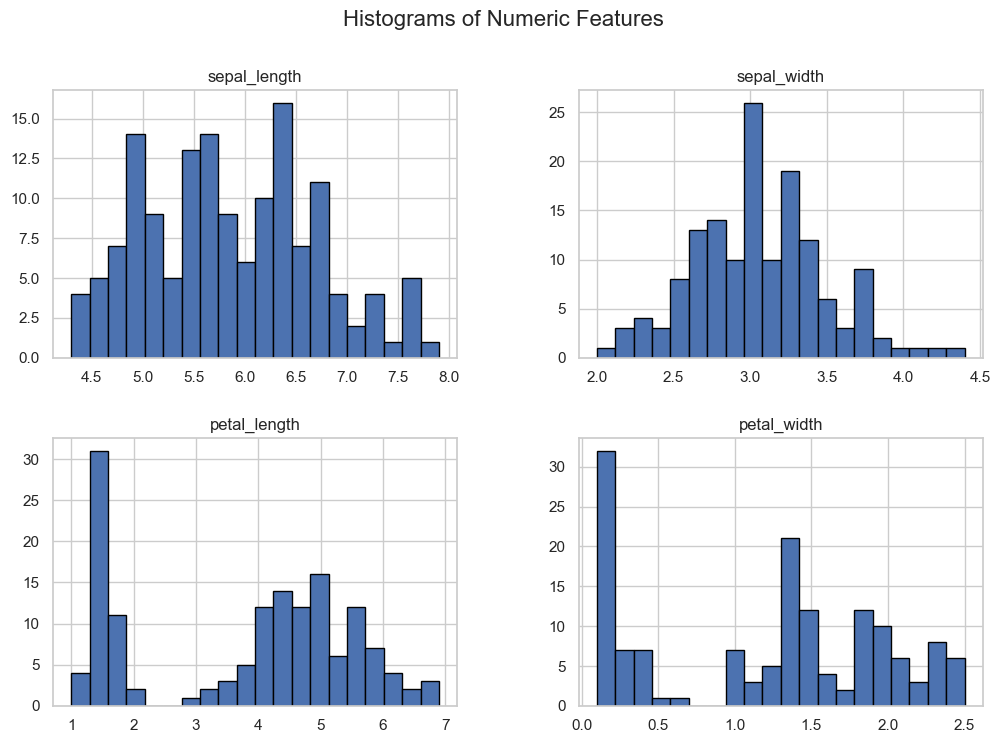

In [20]:
# Step 4: Visualize Data Distributions

# Histograms
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()



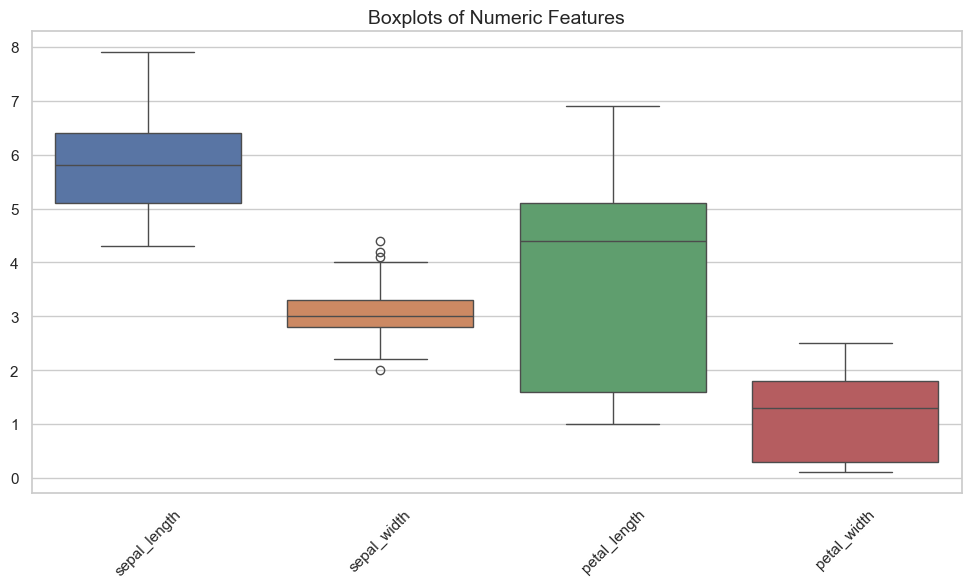

In [21]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()



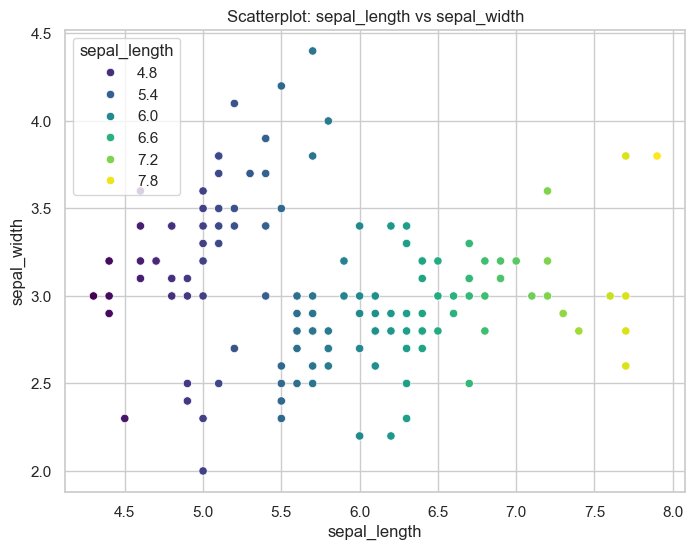

In [22]:
# Scatterplots (Example: between first two numeric columns)
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]], hue=df[numeric_cols[0]], palette='viridis')
    plt.title(f"Scatterplot: {numeric_cols[0]} vs {numeric_cols[1]}")
    plt.show()



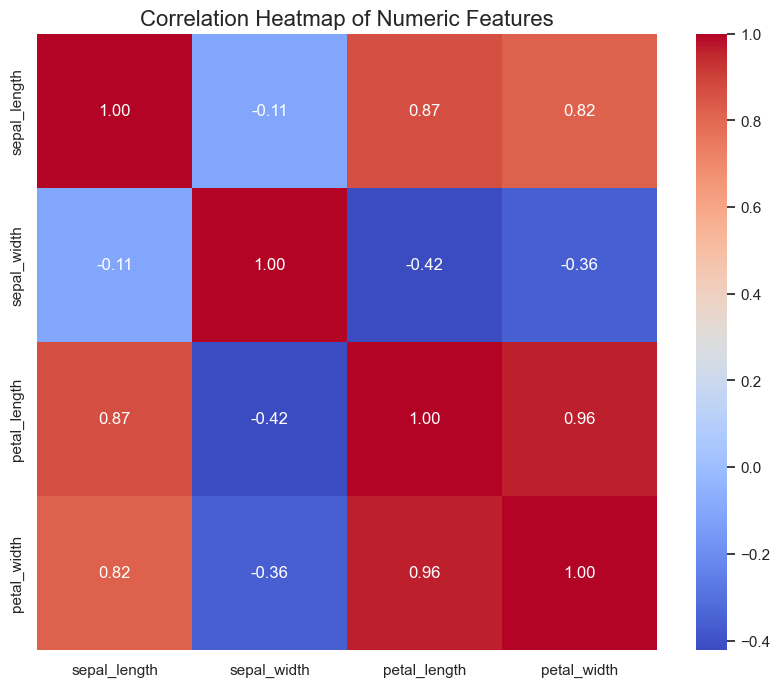

In [23]:
# Step 5: Correlation Matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


In [24]:
df = pd.read_csv("cleaned_dataset.csv")

# Optional: Set Seaborn style
sns.set(style="whitegrid")

Available columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


C:\Users\Vishal Singh\AppData\Local\Temp\ipykernel_7460\1195918615.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_column, y=numerical_column, data=df, palette='viridis')


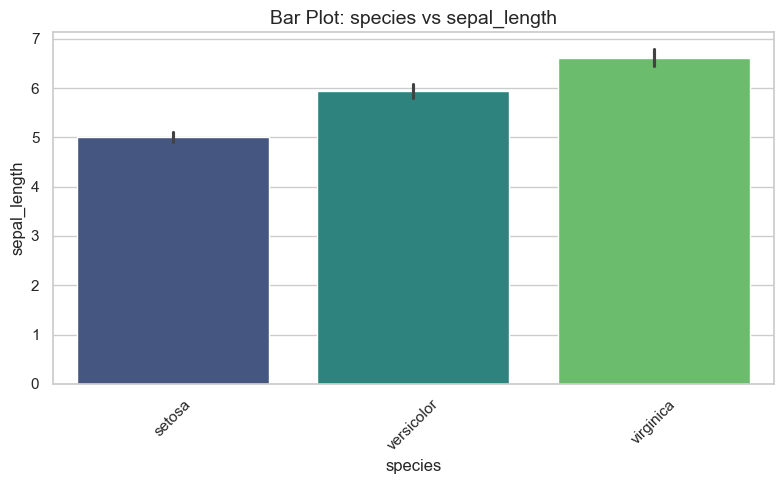

In [25]:
# Step 3: Bar Plot (categorical vs numerical)
plt.figure(figsize=(8, 5))

# First, check available columns in your dataframe
print("Available columns:", df.columns.tolist())

# Get the first categorical column automatically
categorical_column = df.select_dtypes(include=['object', 'category']).columns[0]

# Get the first numerical column automatically
numerical_column = df.select_dtypes(include='number').columns[0]

# Create the bar plot using actual columns from your dataframe
sns.barplot(x=categorical_column, y=numerical_column, data=df, palette='viridis')

plt.title(f"Bar Plot: {categorical_column} vs {numerical_column}", fontsize=14)
plt.xlabel(categorical_column, fontsize=12)
plt.ylabel(numerical_column, fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bar_plot.png", dpi=300)
plt.show()


In [26]:
# Step 4: Line Chart (Example: date vs numeric feature)
if 'date' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='date', y=df.select_dtypes(include='number').columns[0], data=df, marker='o')
    plt.title("Line Chart: Date vs Value", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("line_chart.png", dpi=300)
    plt.show()

C:\Users\Vishal Singh\AppData\Local\Temp\ipykernel_7460\546287365.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=numeric_cols[0], y=numeric_cols[1], data=df, hue='category' if 'category' in df.columns else None, palette='coolwarm')
C:\Users\Vishal Singh\AppData\Local\Temp\ipykernel_7460\546287365.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category', loc='best')


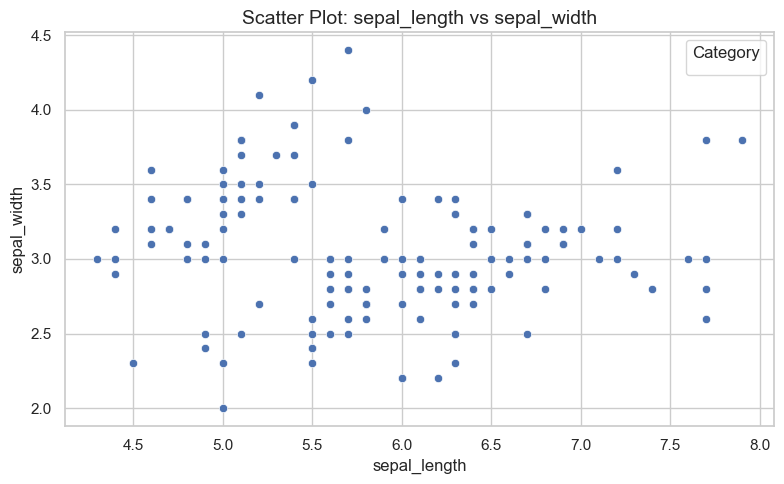

In [27]:
# Step 5: Scatter Plot (Relationship between two numeric columns)
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=numeric_cols[0], y=numeric_cols[1], data=df, hue='category' if 'category' in df.columns else None, palette='coolwarm')
    plt.title(f"Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}", fontsize=14)
    plt.xlabel(numeric_cols[0], fontsize=12)
    plt.ylabel(numeric_cols[1], fontsize=12)
    plt.legend(title='Category', loc='best')
    plt.tight_layout()
    plt.savefig("scatter_plot.png", dpi=300)
    plt.show()

In [28]:
print("✅ Plots saved as 'bar_plot.png', 'line_chart.png', and 'scatter_plot.png'")

✅ Plots saved as 'bar_plot.png', 'line_chart.png', and 'scatter_plot.png'


In [29]:
#What this script does:

#Bar plot → categorical vs numerical feature

#Line chart → time-series trend

#Scatter plot → relationship between two numerical features

#Customizations:

#Titles, axis labels, legends, rotation for readability

#Color palettes for better visuals

#Saves plots as high-resolution .png for reports

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
#hello

In [32]:
# Step 2: Load cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

In [33]:
# Step 3: Select variables (Example: predict numeric_col2 based on numeric_col1)
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) < 2:
    raise ValueError("Dataset must have at least two numeric columns for regression.")

X = df[[numeric_cols[0]]]  # Independent variable
y = df[numeric_cols[1]]    # Dependent variable



In [34]:
# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:
# Step 5: Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [36]:
# Step 6: Interpret coefficients
print(f"Intercept (β₀): {model.intercept_}")
print(f"Coefficient (β₁) for {numeric_cols[0]}: {model.coef_[0]}")



Intercept (β₀): 3.4433278173563093
Coefficient (β₁) for sepal_length: -0.06239247670283017


In [37]:
# Step 7: Predict on test set
y_pred = model.predict(X_test)



In [38]:
# Step 8: Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")



R-squared: -0.0481
Mean Squared Error: 0.1768


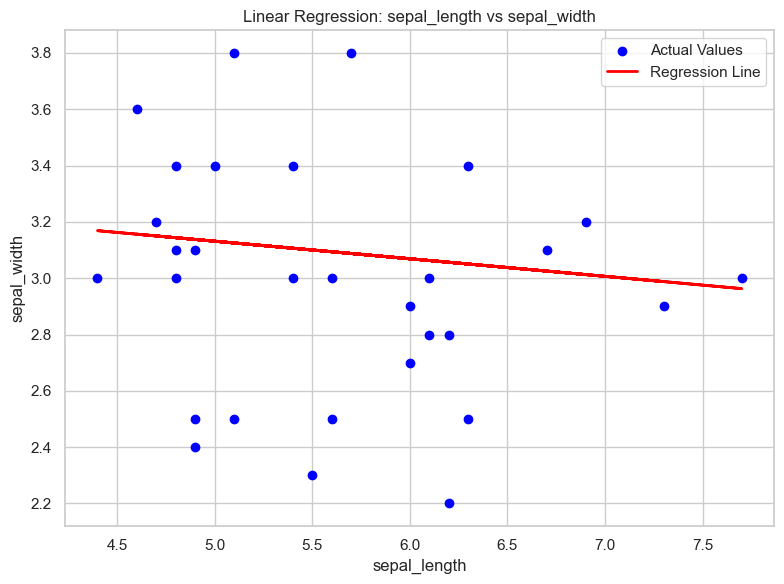

In [39]:
# Step 9: Visualization - regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.title(f"Linear Regression: {numeric_cols[0]} vs {numeric_cols[1]}")
plt.legend()
plt.tight_layout()
plt.savefig("linear_regression_plot.png", dpi=300)
plt.show()

In [40]:

from statsmodels.tsa.seasonal import seasonal_decompose



In [41]:

# Step 2: Load the dataset (ensure 'date' is parsed as datetime)
df = pd.read_csv(r"C:\Users\Vishal Singh\Desktop\data analysis projects\coevetatechnologies/2) Stock Prices Data Set.csv", parse_dates=['date'], index_col='date')



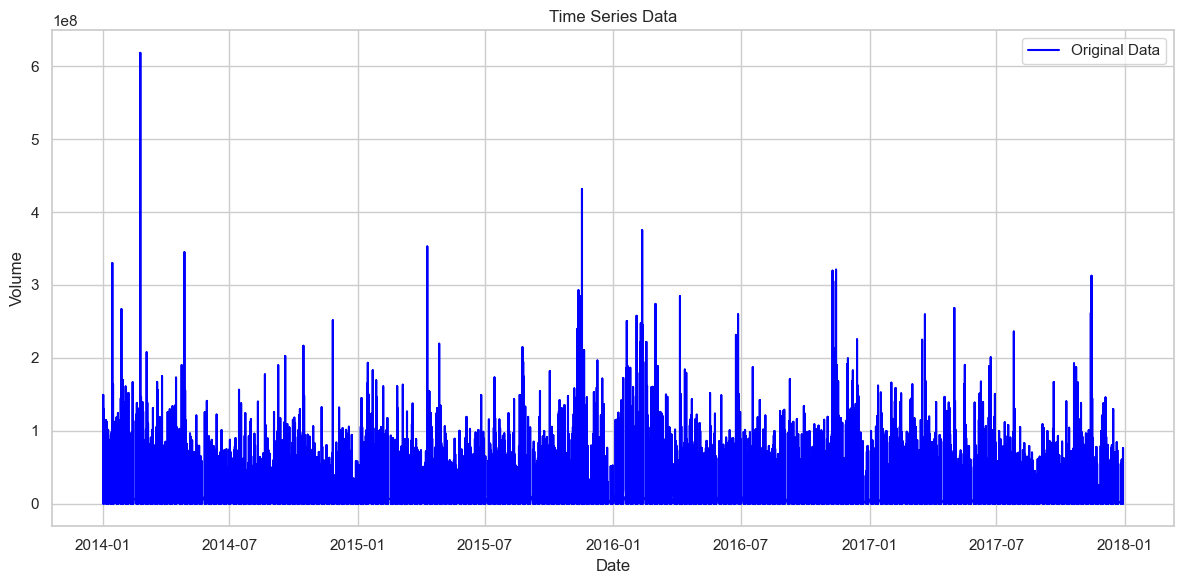

In [42]:
# Step 3: Plot raw time series
plt.figure(figsize=(12, 6))
# Replace 'column_name' with the actual column name from your DataFrame
# For example, if your data is in a column called 'value' or 'price', use that instead
column_name = 'volume'  # Change this to your actual column name in the DataFrame
plt.plot(df.index, df[column_name], label="Original Data", color='blue')
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.tight_layout()
plt.savefig("time_series_original.png", dpi=300)
plt.show()


           symbol      open      high       low     close    volume
date                                                               
2014-01-02    AAL   25.0700   25.8200   25.0600   25.3600   8998943
2014-01-02   AAPL   79.3828   79.5756   78.8601   79.0185  58791957
2014-01-02    AAP  110.3600  111.8800  109.2900  109.7400    542711
2014-01-02   ABBV   52.1200   52.3300   51.5200   51.9800   4569061
2014-01-02    ABC   70.1100   70.2300   69.4800   69.8900   1148391
Selected column type: float64
date
2014-01-02     25.0700
2014-01-02     79.3828
2014-01-02    110.3600
2014-01-02     52.1200
2014-01-02     70.1100
Name: open, dtype: float64


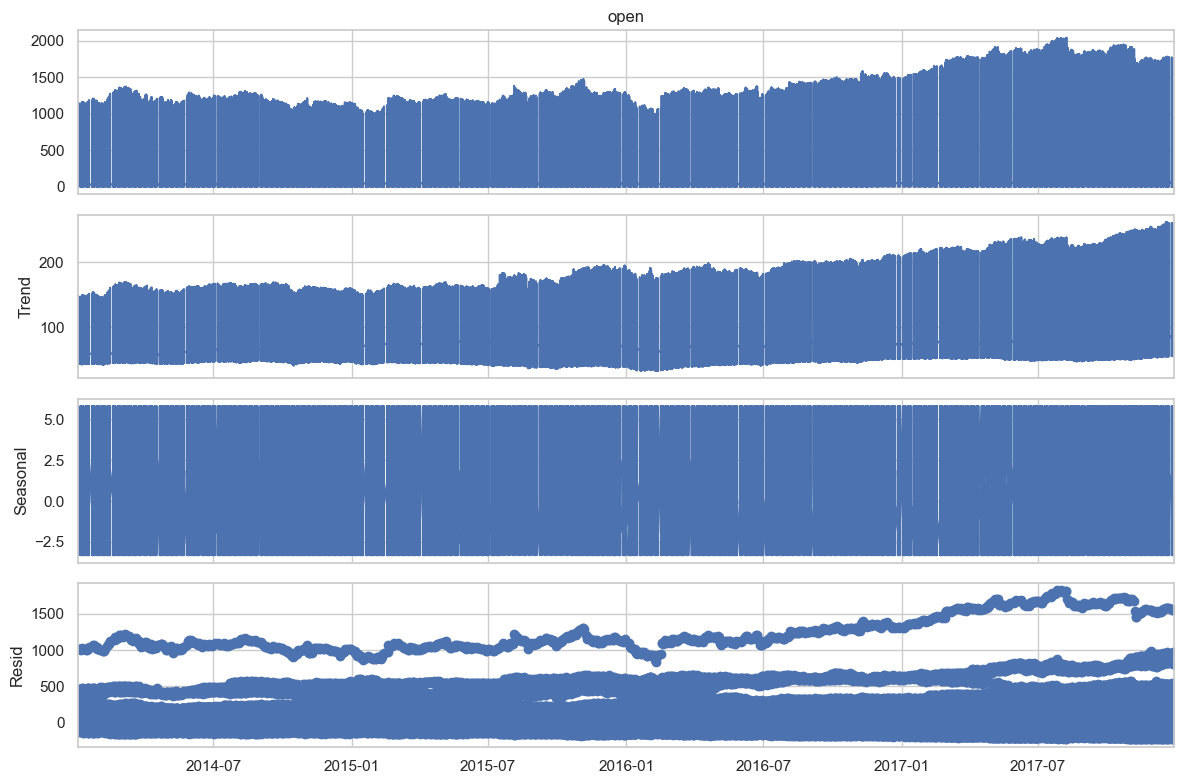

In [43]:
# Step 4: Decompose time series (additive model)
# First, ensure we're using a numeric column for decomposition
# If the first column contains string values like 'AAL', we need to select a numeric column instead

# Check the dataframe structure
print(df.head())  # This helps identify which column contains numeric data

# Assuming there's a numeric column at position 1 (index 1)
numeric_column = df.iloc[:, 1]  # Change this index to match your numeric column

# Verify the column is numeric
print(f"Selected column type: {numeric_column.dtype}")
print(numeric_column.head())

# Handle missing values before decomposition
# Option 1: Drop missing values
numeric_column_clean = numeric_column.dropna()

# Option 2: Fill missing values (alternative approach)
# numeric_column_clean = numeric_column.interpolate()  # Linear interpolation
# numeric_column_clean = numeric_column.fillna(method='ffill')  # Forward fill
# numeric_column_clean = numeric_column.fillna(numeric_column.mean())  # Fill with mean

# Now decompose using the cleaned numeric column
decomposition = seasonal_decompose(numeric_column_clean, model='additive', period=12)  # Adjust 'period' as per data frequency

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.savefig("time_series_decomposition.png", dpi=300)
plt.show()

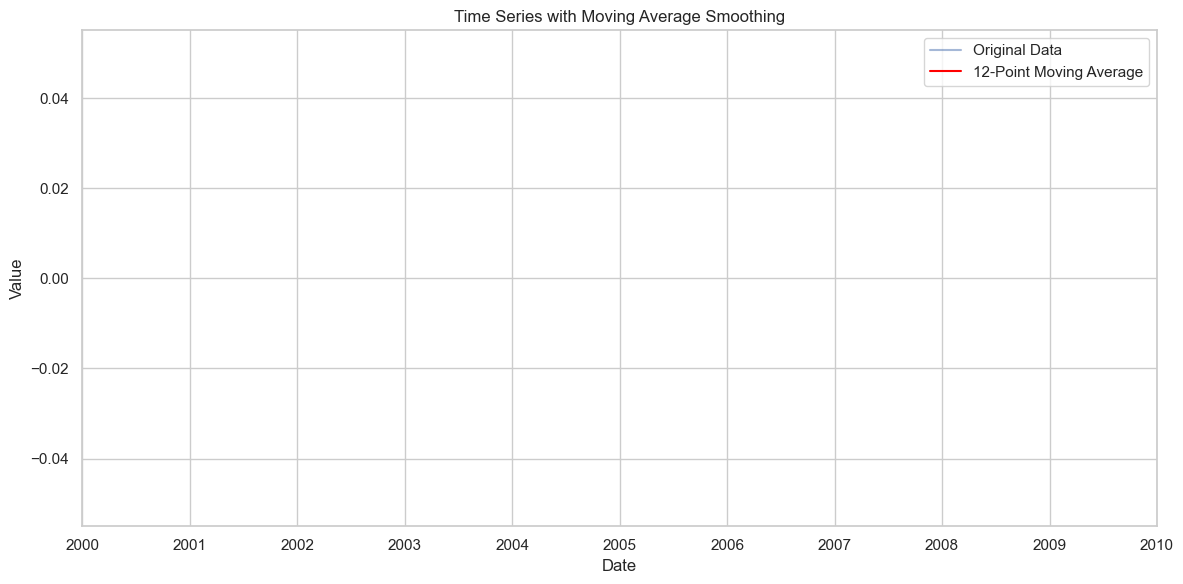

In [44]:
# Step 5: Moving Average Smoothing
window_size = 12  # 12 months for yearly seasonality, change as needed

# Convert the column to numeric type, errors='coerce' will convert non-numeric values to NaN
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')

# Now calculate the moving average
df['Moving_Avg'] = df.iloc[:, 0].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:, 0], label="Original Data", alpha=0.5)
plt.plot(df['Moving_Avg'], label=f"{window_size}-Point Moving Average", color='red')
plt.title("Time Series with Moving Average Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("time_series_moving_avg.png", dpi=300)
plt.show()

In [45]:


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [46]:
# Step 2: Load cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")



In [47]:
# Step 3: Select numeric features for clustering
numeric_cols = df.select_dtypes(include='number').columns
X = df[numeric_cols]



In [48]:
# Step 4: Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

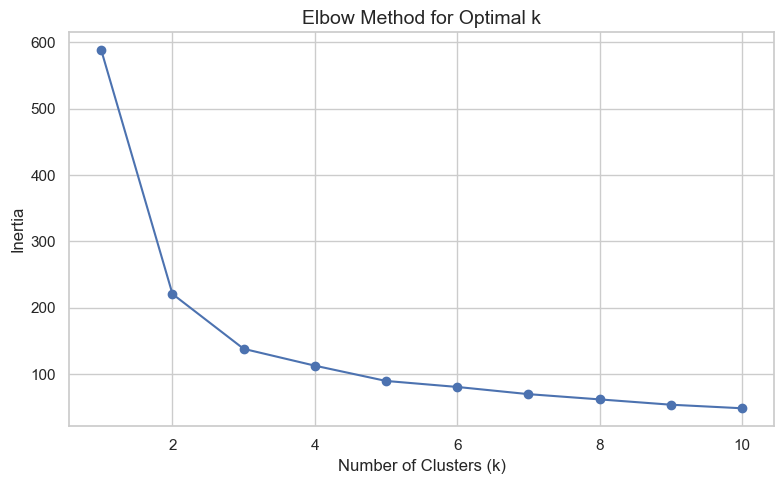

In [49]:

# Step 5: Determine optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.savefig("kmeans_elbow_method.png", dpi=300)
plt.show()



In [50]:
# Step 6: Fit K-Means with chosen k (example: k=3)
optimal_k = 3  # Change after checking elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


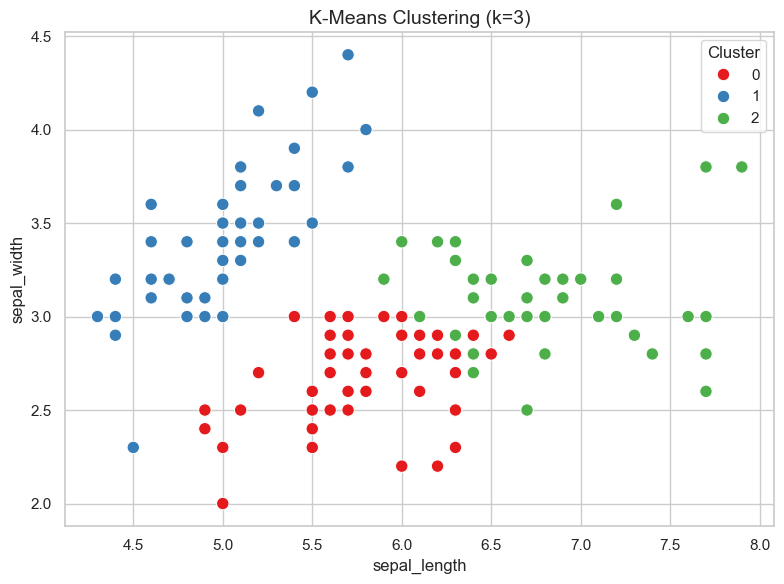

✅ K-Means clustering complete. Plots saved as 'kmeans_elbow_method.png' and 'kmeans_clusters.png'


In [51]:

# Step 7: Visualize clusters in 2D (using first two numeric features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X[numeric_cols[0]], 
    y=X[numeric_cols[1]], 
    hue=df['Cluster'], 
    palette='Set1', 
    s=80
)
plt.title(f"K-Means Clustering (k={optimal_k})", fontsize=14)
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("kmeans_clusters.png", dpi=300)
plt.show()

print(f"✅ K-Means clustering complete. Plots saved as 'kmeans_elbow_method.png' and 'kmeans_clusters.png'")

In [52]:
# now it is basicallyfor the  churn data  but let us see what happen with this data

In [53]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [54]:
# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\Vishal Singh\Desktop\data analysis projects\coevetatechnologies\Churn Prdiction Data\Churn Prdiction Data/churn-bigml-80.csv")




In [55]:
# Rename 'Churn' to 'target'
df.rename(columns={'Churn': 'target'}, inplace=True)

# Safety check
if 'target' not in df.columns:
    raise ValueError("Please ensure your dataset contains a 'target' column for classification.")# Rename 'Churn' to 'target'


In [56]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'target'],
      dtype='object')


In [57]:
# Step 4: Separate features and target
X = df.drop('target', axis=1)
y = df['target']



In [58]:
# Step 5: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns



In [59]:
# Step 6: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)



In [60]:
# Step 7: Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}



In [61]:
# Step 8: Train & evaluate each model
results = []
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)




Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.844569   0.813419  0.844569  0.822293
1        Decision Tree  0.893258   0.888679  0.893258  0.890557
2        Random Forest  0.936330   0.937743  0.936330  0.929884


In [62]:
# Step 9: Hyperparameter Tuning (Example: Random Forest)
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy from Grid Search:", grid_search.best_score_)




Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best Accuracy from Grid Search: 0.9385614231839122


In [63]:
# Step 10: Final Evaluation of Tuned Model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_best))


Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       455
        True       0.98      0.51      0.67        79

    accuracy                           0.93       534
   macro avg       0.95      0.75      0.81       534
weighted avg       0.93      0.93      0.91       534



In [64]:
# afterthat create a powerbi dashboard and after that in power dax do some adjustments and finally share it plus 
#after that do nlp i.e, sentiment plus wordcloud analysis  using nltk or textblob then make a report

In [65]:
whos DataFrame

Variable          Type         Data/Info
----------------------------------------
X                 DataFrame         State  Account lengt<...>n[2666 rows x 19 columns]
     State  Account lengt<...>\n[534 rows x 19 columns]
X_train           DataFrame         State  Account lengt<...>n[2132 rows x 19 columns]
corr_matrix       DataFrame                  sepal_lengt<...>    0.961883     1.000000
     State  Account lengt<...>n[2666 rows x 20 columns]
numeric_columns   DataFrame         sepal_length  sepal_<...>n\n[147 rows x 4 columns]
results_df        DataFrame                     Model  A<...>37743  0.936330  0.929884


In [67]:
X.to_csv("cleaned_data1.csv", index=False)
X_train.to_csv("cleaned_data2.csv", index=False)
corr_matrix.to_csv("cleaned_data3.csv", index=False)
numeric_columns.to_csv("cleaned_data4.csv", index=False)
results_df.to_csv("cleaned_data5.csv", index=False)


In [68]:
import os
os.getcwd()

'C:\\Users\\Vishal Singh\\desktop\\data analysis projects\\coevetatechnologies'